In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron  # Linear Classifier (Perceptron)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings

In [11]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load Tour.csv into Tour_data
Tour_data = pd.read_csv('Tour.csv', delimiter=',')

# Display the first few rows of the dataset to verify
Tour_data.head

<bound method NDFrame.head of         Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3                

In [27]:
from sklearn.linear_model import Perceptron  # Linear classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier (Perceptron)
linear_classifier = Perceptron()
linear_classifier.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = linear_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5075


In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset for training (replace this with your actual data)
# Tour_data = pd.read_csv('your_data.csv')

# Separate features (X) and target (Y)
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert target to binary (if needed)
Y = Y.map({'Yes': 1, 'No': 0})

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical variables to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both training and test data have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(X_train, Y_train)

# Example input data for prediction
input_data_str = ['62', '0', '0', '140', '268', '0', '0', '160', '0', '3.6', '0', '2', '2']  # Example data
input_data = np.array(input_data_str, dtype=float).reshape(1, -1)

# Create a DataFrame with the same columns as X_train
input_df = pd.DataFrame(columns=X_train.columns)  # Empty DataFrame with X_train's structure
input_df.loc[0] = 0  # Initialize with zeros
input_df.iloc[0, :len(input_data[0])] = input_data[0]  # Fill in the provided data

# Make prediction
prediction = perceptron_model.predict(input_df)

# Convert prediction to binary and print result
if prediction[0] == 1:
    print("Accommodation is Available (Yes)")
else:
    print("Accommodation is Not Available (No)")


Accommodation is Not Available (No)


In [18]:
import pickle
from sklearn.linear_model import Perceptron  # Linear classifier (Perceptron)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Perceptron model (Linear classifier)
linear_classifier_model = Perceptron()
linear_classifier_model.fit(X_train, Y_train)

# Saving the trained model using pickle
filename = 'tour_data_linear_classifier_model.sav'
pickle.dump(linear_classifier_model, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('tour_data_linear_classifier_model.sav', 'rb'))

# Predict and evaluate with the loaded model
Y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

# Printing accuracy score
print("Accuracy Score:", accuracy)

# Printing the names of all columns in the feature set (X)
for column in X.columns:
    print(column)


Accuracy Score: 0.5075125208681135
Location
Country
Category
Visitors
Rating
Revenue


In [21]:
import time
from memory_profiler import memory_usage
from sklearn.linear_model import Perceptron  # True Linear Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    # Get the size of the dataset
    max_size = len(data)
    
    # Adjust sizes if necessary to avoid sampling more rows than available
    sizes = [size for size in sizes if size <= max_size]
    
    for size in sizes:
        subset_data = data.sample(n=size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Measure time and memory usage
        start_time = time.time()
        start_memory = memory_usage()[0]  # Get the first value from memory_usage()

        # Initialize and train the Linear Classifier (Perceptron)
        model = Perceptron()
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage()[0] - start_memory  # Get the first value from memory_usage()
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        
        # Evaluate model performance
        accuracy = accuracy_score(Y_test, Y_pred)  # Accuracy for classification
        print(f"Data Size: {size}")
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Prediction Time: {prediction_time:.4f} seconds")
        print(f"Memory Usage: {memory_used:.2f} MB")
        print(f"Accuracy: {accuracy:.4f}")
        print("-" * 50)

# Run the test with different data sizes
test_scalability(Tour_data)


Data Size: 500
Training Time: 0.1058 seconds
Prediction Time: 0.0000 seconds
Memory Usage: 0.00 MB
Accuracy: 0.4700
--------------------------------------------------
Data Size: 1000
Training Time: 0.1192 seconds
Prediction Time: 0.0026 seconds
Memory Usage: 0.00 MB
Accuracy: 0.5300
--------------------------------------------------
Data Size: 5000
Training Time: 0.8524 seconds
Prediction Time: 0.0549 seconds
Memory Usage: 0.00 MB
Accuracy: 0.5410
--------------------------------------------------


In [30]:
from sklearn.linear_model import Perceptron  # Linear classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix
import pandas as pd

# Check the class distribution of 'Accommodation_Available'
print(Tour_data['Accommodation_Available'].value_counts())

# Prepare data
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier (Perceptron)
linear_classifier = Perceptron(max_iter=1000, random_state=45)
linear_classifier.fit(X_train, Y_train)

# Predict using the trained model
Y_pred = linear_classifier.predict(X_test)

# Calculate precision
precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision:.4f}")

# Check confusion matrix to better understand the predictions
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accommodation_Available
Yes    3013
No     2976
Name: count, dtype: int64
Precision: 0.5043
Confusion Matrix:
[[551  57]
 [532  58]]


In [31]:
import pandas as pd
from sklearn.linear_model import Perceptron  # Linear classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# Load the dataset
dataset = pd.read_csv('Tour.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier model (Perceptron)
linear_classifier = Perceptron(max_iter=1000, random_state=45)
linear_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_classifier.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]
Precision: 0.5043478260869565
Accuracy: 0.508347245409015
Confusion Matrix:
 [[551  57]
 [532  58]]


In [32]:
import pandas as pd
from sklearn.linear_model import Perceptron  # Linear classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# Load the dataset
dataset = pd.read_csv('Tour.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier model (Perceptron)
linear_classifier = Perceptron(max_iter=1000, random_state=45)
linear_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_classifier.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# -------------------------
# Fairness Analysis
# -------------------------
# Group-wise evaluation based on 'Country' (example)
if 'Country' in dataset.columns:
    groups = dataset['Country'].unique()
    print("\nFairness Analysis by 'Country':")
    for group in groups:
        group_data = dataset[dataset['Country'] == group]
        if not group_data.empty:
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            y_group = group_data['Accommodation_Available']
            y_group = y_group.map({'Yes': 1, 'No': 0})  # Convert to numeric
            
            # Convert categorical data to dummies
            X_group = pd.get_dummies(X_group, drop_first=True)
            
            # Align columns to match training data
            X_group = X_group.reindex(columns=X_train.columns, fill_value=0)
            
            # Predict for this group
            y_group_pred = linear_classifier.predict(X_group)
            
            # Evaluate
            group_precision = precision_score(y_group, y_group_pred)
            group_accuracy = accuracy_score(y_group, y_group_pred)
            group_conf_matrix = confusion_matrix(y_group, y_group_pred)
            
            print(f"Country: {group}")
            print(f"  Group Precision: {group_precision}")
            print(f"  Group Accuracy: {group_accuracy}")
            print(f"  Group Confusion Matrix:\n {group_conf_matrix}")
else:
    print("No 'Country' column found for fairness analysis.")


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]
Precision: 0.5043478260869565
Accuracy: 0.508347245409015
Confusion Matrix:
 [[551  57]
 [532  58]]

Fairness Analysis by 'Country':
Country: India
  Group Precision: 0.5217391304347826
  Group Accuracy: 0.5033482142857143
  Group Confusion Matrix:
 [[403  44]
 [401  48]]
Country: USA
  Group Precision: 0.5952380952380952
  Group Accuracy: 0.49174528301886794
  Group Confusion Matrix:
 [[367  34]
 [397  50]]
Country: Brazil
  Group Precision: 0.41935483870967744
  Group Accuracy: 0.4607142857142857
  Group Confusion Matrix:
 [[348  54]
 [399  39]]
Country: France
  Group Precision: 0.5348837209302325
  Group Accuracy: 0.5099183197199533
  Group Confusion Matrix:
 [[391  40]
 [380  46]]
Country: Egypt
  Group Precision: 0.5652173913043478
  Group Accuracy: 0.5175438596491229
  

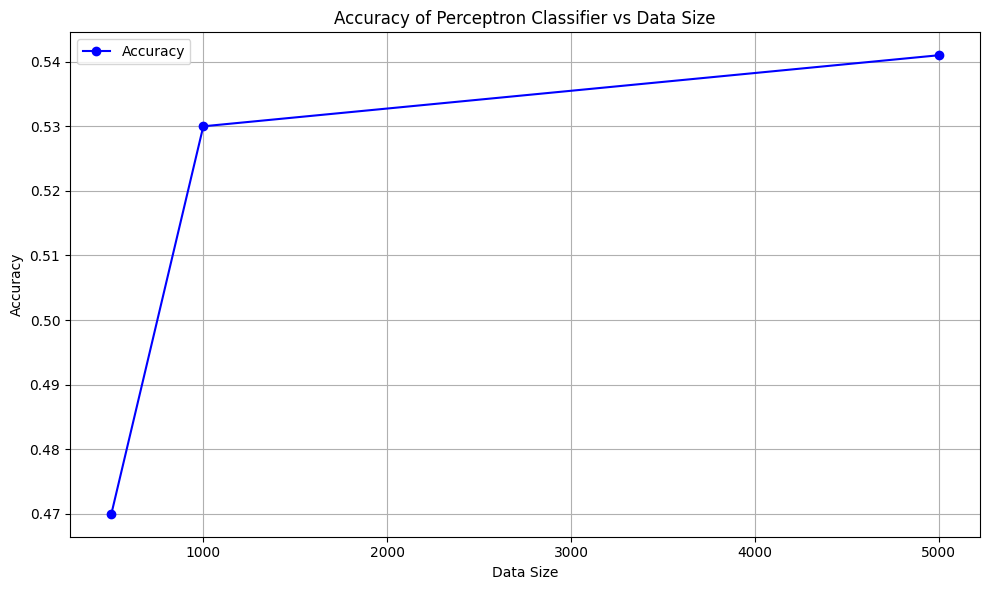

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Check the size of the dataset
data_size = len(Tour_data)

# Define sample sizes based on the available data (adjust if the size exceeds the dataset)
data_sizes = [500, 1000, 5000, 10000, 20000]
data_sizes = [size for size in data_sizes if size <= data_size]  # Ensure sizes do not exceed available data

accuracy_values = []  # List to store accuracy for each sample size

# Loop through different data sizes and calculate accuracy
for size in data_sizes:
    # Sample data of current size
    subset_data = Tour_data.sample(n=size, random_state=42)
    
    # Define X and Y
    X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
    Y = subset_data['Accommodation_Available']
    
    # Convert non-numeric Y if needed
    Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

    # Convert categorical columns to numerical using get_dummies
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)

    # Align columns in X_test to match X_train
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    # Initialize and train the Linear Classifier (Perceptron)
    linear_classifier = Perceptron()
    linear_classifier.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred = linear_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)  # Calculate accuracy

    # Store accuracy
    accuracy_values.append(accuracy)

# Plotting the accuracy values against the data sizes
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, accuracy_values, marker='o', color='b', label='Accuracy')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy of Perceptron Classifier vs Data Size')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Data Size: 500
Training Time: 0.1008 seconds
Prediction Time: 0.0045 seconds
Memory Usage: 0.00 MB
Accuracy: 0.4700
--------------------------------------------------
Data Size: 1000
Training Time: 0.1373 seconds
Prediction Time: 0.0083 seconds
Memory Usage: 0.00 MB
Accuracy: 0.5300
--------------------------------------------------
Data Size: 5000
Training Time: 0.8640 seconds
Prediction Time: 0.0547 seconds
Memory Usage: 0.00 MB
Accuracy: 0.5410
--------------------------------------------------


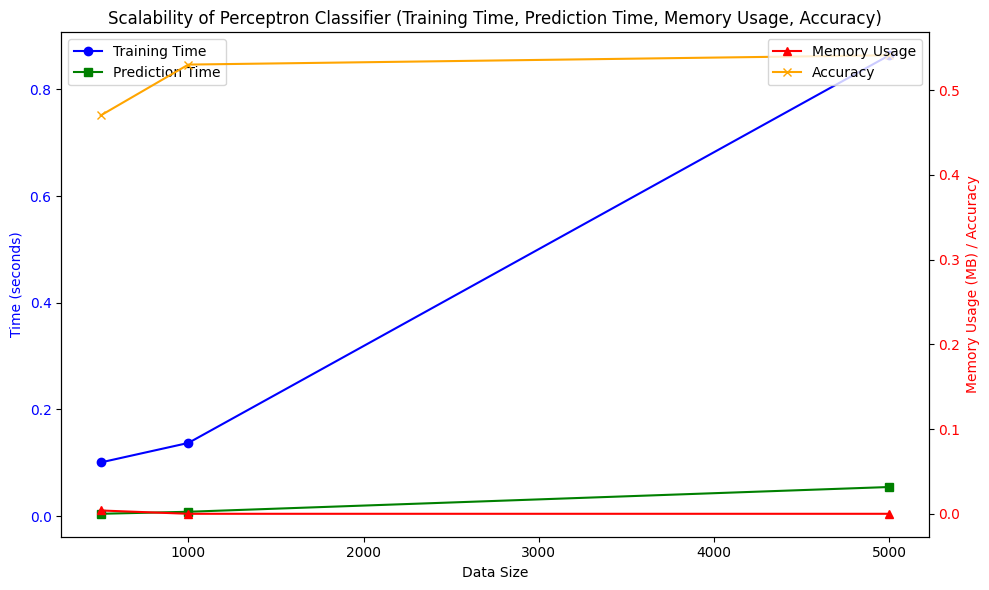

In [35]:
import time
from memory_profiler import memory_usage
from sklearn.linear_model import Perceptron  # True Linear Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    # Get the size of the dataset
    max_size = len(data)
    
    # Adjust sizes if necessary to avoid sampling more rows than available
    sizes = [size for size in sizes if size <= max_size]
    
    # Lists to store values for plotting
    training_times = []
    prediction_times = []
    memory_usages = []
    accuracies = []
    
    for size in sizes:
        subset_data = data.sample(n=size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Measure time and memory usage
        start_time = time.time()
        start_memory = memory_usage()[0]  # Get the first value from memory_usage()

        # Initialize and train the Linear Classifier (Perceptron)
        model = Perceptron()
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage()[0] - start_memory  # Get the first value from memory_usage()
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        
        # Evaluate model performance
        accuracy = accuracy_score(Y_test, Y_pred)  # Accuracy for classification
        
        # Store the results
        training_times.append(training_time)
        prediction_times.append(prediction_time)
        memory_usages.append(memory_used)
        accuracies.append(accuracy)

        print(f"Data Size: {size}")
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Prediction Time: {prediction_time:.4f} seconds")
        print(f"Memory Usage: {memory_used:.2f} MB")
        print(f"Accuracy: {accuracy:.4f}")
        print("-" * 50)

    # Plotting the results
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot training time and prediction time
    ax1.set_xlabel('Data Size')
    ax1.set_ylabel('Time (seconds)', color='b')
    ax1.plot(sizes, training_times, marker='o', color='b', label='Training Time')
    ax1.plot(sizes, prediction_times, marker='s', color='g', label='Prediction Time')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Create a second y-axis for memory usage and accuracy
    ax2 = ax1.twinx()
    ax2.set_ylabel('Memory Usage (MB) / Accuracy', color='r')
    ax2.plot(sizes, memory_usages, marker='^', color='r', label='Memory Usage')
    ax2.plot(sizes, accuracies, marker='x', color='orange', label='Accuracy')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Title and display the plot
    plt.title('Scalability of Perceptron Classifier (Training Time, Prediction Time, Memory Usage, Accuracy)')
    fig.tight_layout()
    plt.show()

# Run the test with different data sizes
test_scalability(Tour_data)


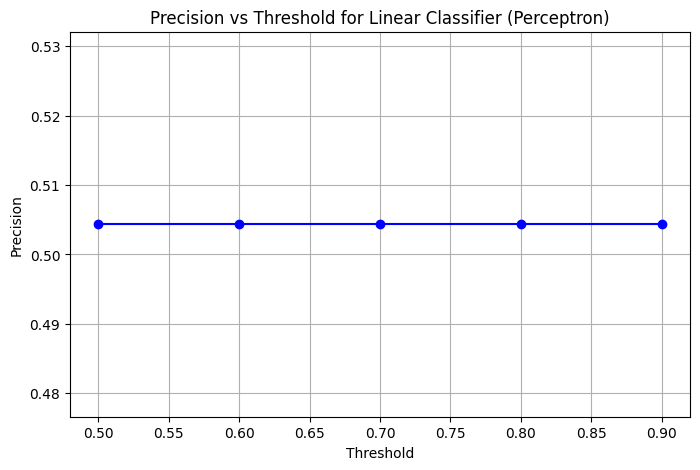

In [42]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import pandas as pd

# Prepare data
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier (Perceptron)
linear_classifier = Perceptron(max_iter=1000, random_state=45)
linear_classifier.fit(X_train, Y_train)

# Predict decision function scores (output of the decision boundary)
Y_pred_score = linear_classifier.decision_function(X_test)

# Function to calculate precision at different thresholds
def plot_precision(Y_test, Y_pred_score):
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
    precisions = []
    
    for threshold in thresholds:
        Y_pred_binary = (Y_pred_score > threshold).astype(int)  # Adjust prediction threshold
        precision = precision_score(Y_test, Y_pred_binary)
        precisions.append(precision)
    
    # Plot Precision vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisions, marker='o', linestyle='-', color='b')
    plt.title('Precision vs Threshold for Linear Classifier (Perceptron)')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

# Plot precision at different thresholds
plot_precision(Y_test, Y_pred_score)


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]
Precision: 0.5043478260869565
Accuracy: 0.508347245409015
Confusion Matrix:
 [[551  57]
 [532  58]]


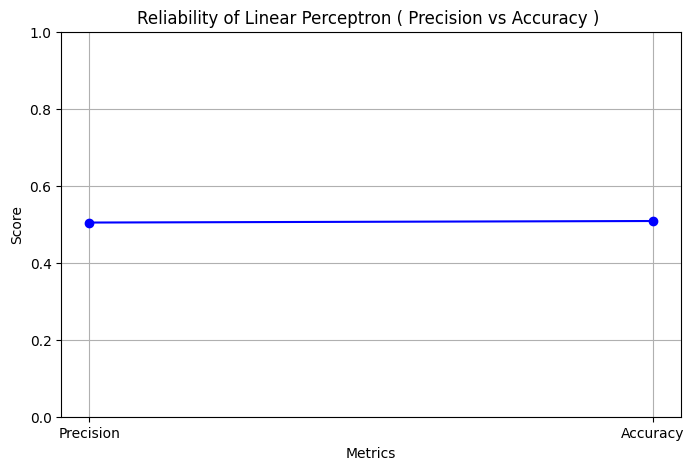

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# Load the dataset
dataset = pd.read_csv('Tour.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier model (Perceptron)
linear_classifier = Perceptron(max_iter=1000, random_state=45)
linear_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_classifier.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plotting Precision vs Accuracy as a line graph
metrics = ['Precision', 'Accuracy']
values = [precision, accuracy]

# Plot as a simple line graph
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Reliability of Linear Perceptron ( Precision vs Accuracy ) ')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Since Precision and Accuracy are between 0 and 1
plt.grid(True)
plt.show()


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]

Fairness Analysis by 'Country':
Country: India
  Group Precision: 0.5217391304347826
  Group Accuracy: 0.5033482142857143
Country: USA
  Group Precision: 0.5952380952380952
  Group Accuracy: 0.49174528301886794
Country: Brazil
  Group Precision: 0.41935483870967744
  Group Accuracy: 0.4607142857142857
Country: France
  Group Precision: 0.5348837209302325
  Group Accuracy: 0.5099183197199533
Country: Egypt
  Group Precision: 0.5652173913043478
  Group Accuracy: 0.5175438596491229
Country: China
  Group Precision: 0.5625
  Group Accuracy: 0.5248138957816377
Country: Australia
  Group Precision: 0.53125
  Group Accuracy: 0.519277108433735


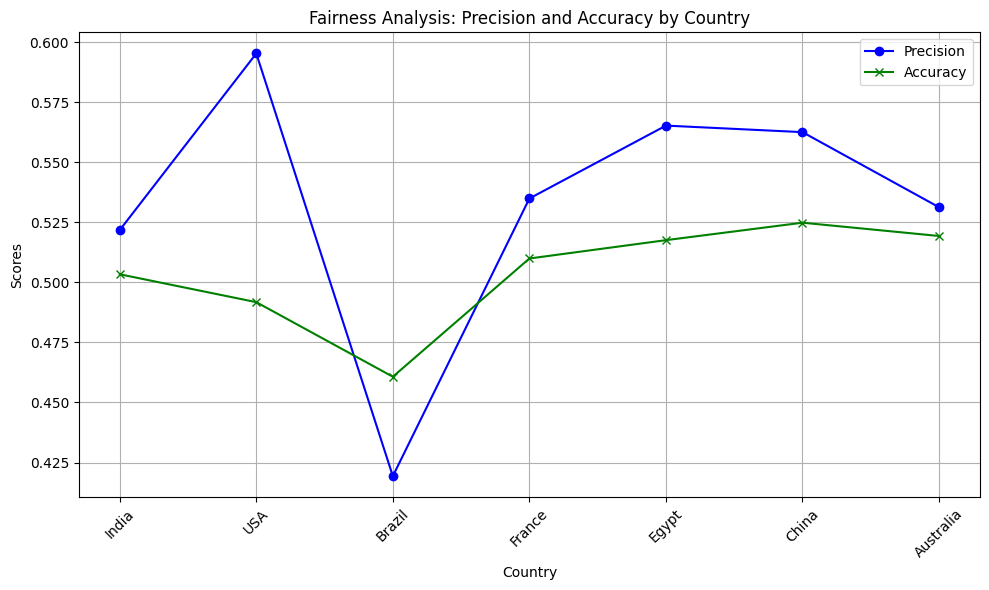

In [47]:
import pandas as pd
from sklearn.linear_model import Perceptron  # Linear classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('Tour.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Classifier model (Perceptron)
linear_classifier = Perceptron(max_iter=1000, random_state=45)
linear_classifier.fit(X_train, y_train)

# -------------------------
# Fairness Analysis
# -------------------------
# Group-wise evaluation based on 'Country' (example)
if 'Country' in dataset.columns:
    groups = dataset['Country'].unique()
    print("\nFairness Analysis by 'Country':")
    
    # Lists to store precision and accuracy for each group
    group_precisions = []
    group_accuracies = []
    group_names = []

    for group in groups:
        group_data = dataset[dataset['Country'] == group]
        if not group_data.empty:
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            y_group = group_data['Accommodation_Available']
            y_group = y_group.map({'Yes': 1, 'No': 0})  # Convert to numeric
            
            # Convert categorical data to dummies
            X_group = pd.get_dummies(X_group, drop_first=True)
            
            # Align columns to match training data
            X_group = X_group.reindex(columns=X_train.columns, fill_value=0)
            
            # Predict for this group
            y_group_pred = linear_classifier.predict(X_group)
            
            # Evaluate
            group_precision = precision_score(y_group, y_group_pred)
            group_accuracy = accuracy_score(y_group, y_group_pred)
            
            # Store values for plotting
            group_precisions.append(group_precision)
            group_accuracies.append(group_accuracy)
            group_names.append(group)
            
            print(f"Country: {group}")
            print(f"  Group Precision: {group_precision}")
            print(f"  Group Accuracy: {group_accuracy}")

    # Plotting the results as a line plot for precision and accuracy comparison
    plt.figure(figsize=(10, 6))

    # Plot Precision vs Accuracy for each group
    plt.plot(group_names, group_precisions, marker='o', label='Precision', color='b')
    plt.plot(group_names, group_accuracies, marker='x', label='Accuracy', color='g')

    plt.xlabel('Country')
    plt.ylabel('Scores')
    plt.title('Fairness Analysis: Precision and Accuracy by Country')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    print("No 'Country' column found for fairness analysis.")
